In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Treat Outliers

In [7]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [8]:
df.shape

(918, 12)

In [9]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]

In [10]:
df1.shape

(915, 12)

In [13]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [14]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [15]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [16]:
df2 = df1[df.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]

C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_700\2719194048.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[df.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]


In [17]:
df2.shape

(909, 12)

In [18]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [19]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]

In [21]:
df3.shape

(902, 12)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [24]:
for column in df3.columns:
    if df3[column].dtypes == np.number:
        continue
    df3[column] = LabelEncoder().fit_transform(df3[column])

C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_700\858919202.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df3[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_700\858919202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[column] = LabelEncoder().fit_transform(df3[column])
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_700\858919202.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df3[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_700\858919202.py:4: Se

In [25]:
df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,97,0,0.0,2,0
1,21,0,2,55,40,0,1,81,0,1.0,1,1
2,9,1,1,31,141,0,2,24,0,0.0,2,0
3,20,0,0,39,72,0,1,33,1,1.5,1,1
4,26,1,2,49,53,0,1,47,0,0.0,2,0


In [26]:
df3.shape

(902, 12)

In [38]:
_x = df3.drop(['HeartDisease'],axis=1)

In [39]:
y = df3.HeartDisease

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:

scale = StandardScaler()
x = scale.fit_transform(_x)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=42)

In [44]:
from  sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.model_selection import cross_val_score

In [48]:
rs = cross_val_score(RandomForestClassifier(n_estimators=100),xtrain,ytrain,cv=5)

In [49]:
rs.mean()

0.8712636165577342

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bagged_model =BaggingClassifier(
        base_estimator=RandomForestClassifier(),
        n_estimators=100,
        max_samples=.80,
        oob_score=True
    )

In [52]:
finalscore = cross_val_score(bagged_model,xtrain,ytrain,cv=5)

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

In [53]:
finalscore.mean()

0.8742047930283224

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(.80)

In [57]:
xpca  = pca.fit_transform(_x)

In [58]:
len(xpca)

902

In [63]:
xpca_train,xpca_test,ypca_train,ypca_test = train_test_split(xpca,y,test_size=.25,random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model1 = RandomForestClassifier()

In [64]:
model1.fit(xpca_train,ypca_train)

RandomForestClassifier()

In [69]:
model1.score(xpca_test,ypca_test)

0.6814159292035398

In [70]:
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [72]:
model.score(xtest,ytest)

0.8628318584070797

In [73]:
pred = model.predict(xtest)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm = confusion_matrix(pred,ytest)

In [76]:
cm 


array([[ 88,  11],
       [ 20, 107]], dtype=int64)

In [77]:
import seaborn as sns 

<Axes: >

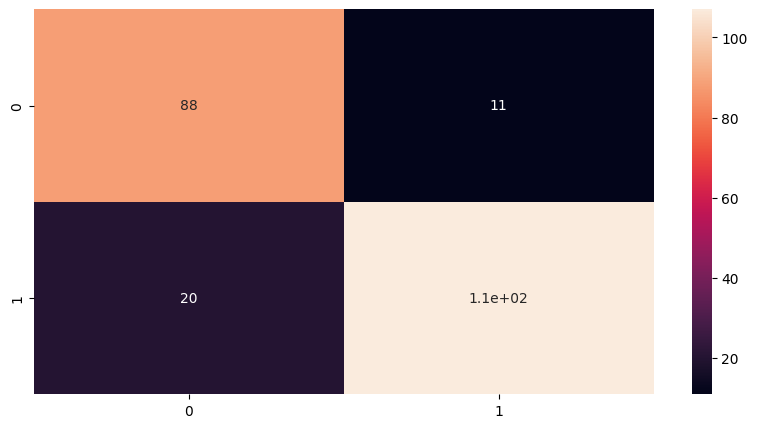

In [78]:
plt.figure(figsize=(10,5))
plt.xlabel('Preidcted')
plt.ylabel('Truth')
sns.heatmap(cm, annot=True)